# Heart Disease Classification

This notebook implements and end-to-end data science project. More specifically, we are building a machine learning model to predict whether or not a patient has heart disease or not based on their medical attributes. The dataset we are using can be found [here](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).



In [1]:
# Importing all necessary packages

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


### Load data

In [2]:
!pip install -q opendatasets

import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset')
# Kaggle username and token required


df = pd.read_csv('/content/heart-disease-classification-dataset/heart disease classification dataset.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: evangelosantypas
Your Kaggle Key: ··········


100%|██████████| 4.15k/4.15k [00:00<00:00, 10.0MB/s]

### EDA

In [4]:
# Get a look at the medical features
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [5]:
# Drop the unnamed column
df = df.drop('Unnamed: 0', axis = 1)
# Change yes/no to 1/0
df['target'] = df['target'].map(dict(yes=1, no=0))
# Change male/female to 1/0
df['sex'] = df['sex'].map(dict(male=1, female=0))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [6]:
print(f'We have {df.shape[0]} patients and {df.shape[1]} medical features for each patient.')

We have 303 patients and 14 medical features for each patient.


In [7]:
# Let's check if the dataset is balanced
counts = df['target'].value_counts()

print(f'The dataset contains {counts[1]} patients with heart disease and {counts[0]} without heart disease.')

The dataset contains 165 patients with heart disease and 138 without heart disease.


In [8]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Drop missing values
df = df.dropna(axis=0)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Descriptive stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    int64  
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    float64
 8   exang     293 non-null    int64  
 9   oldpeak   293 non-null    float64
 10  slope     293 non-null    int64  
 11  ca        293 non-null    int64  
 12  thal      293 non-null    int64  
 13  target    293 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.3 KB


Text(0.5, 1.0, 'Correlation Matrix')

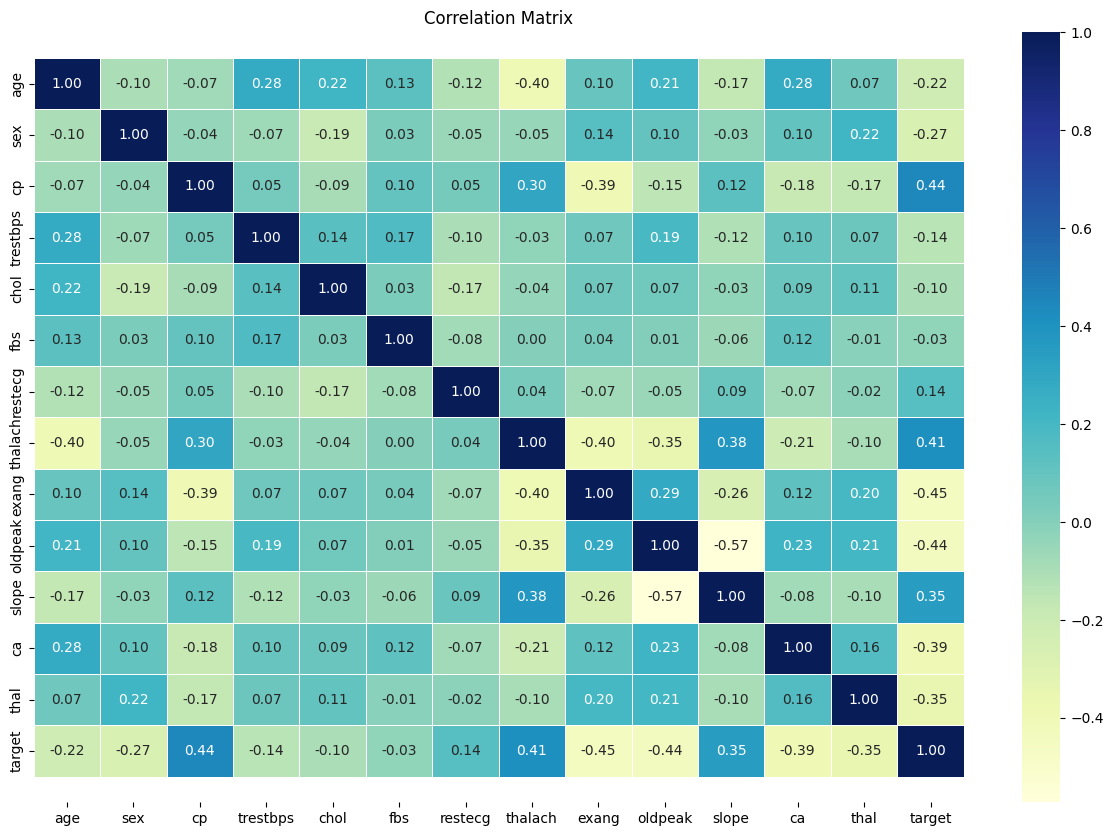

In [12]:
# Correlation matrix
cor_mat = df.corr()
fig, axs = plt.subplots(figsize = (15,10))
axs = sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt='.2f',cmap='YlGnBu')
bottom,top = axs.get_ylim()
axs.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix')

### Modelling

In [13]:
# Split the dataset into features and targets
X = df.drop('target', axis = 1)
y = df.target.values
X.shape, y.shape

((293, 13), (293,))

In [14]:
# Train/test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_train.shape,y_train.shape,y_test.shape

((234, 13), (234, 13), (234,), (59,))

In [15]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,43,0,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,64,0,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,58,0,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [16]:
y_train


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

We are goint to try 3 different models:


1.   Logistic Regression
2.   K-Nearest Neighbors
3.   Random Forest



In [17]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6101694915254238,
 'Logistic Regression': 0.7966101694915254,
 'Random Forest': 0.8305084745762712}

### Hyperparemeter Tuning

Now that we have some baseline models we can try to obtain better performance by tuning their hyperparameters. We try two different methods:



1.   RandomizedSearchCV()
2.   GridSearchCV()



In [19]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [20]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [22]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

In [23]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [24]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [25]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8305084745762712

RandomForest wins.

### Let's evaluate our best model beyond accuracy.

In [26]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

In [27]:
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

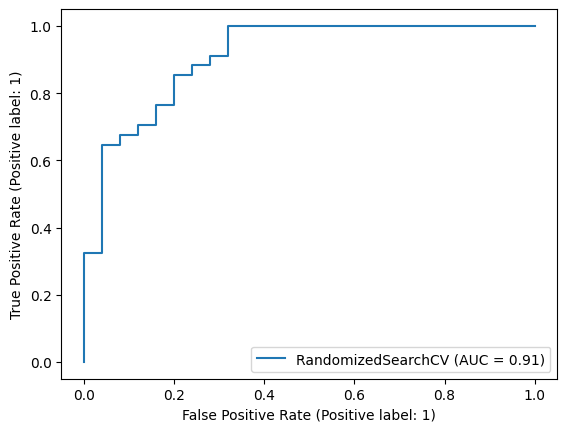

In [28]:
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=rs_rf,
                               X=X_test,
                               y=y_test);

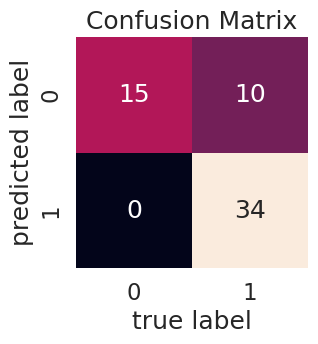

In [29]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("Confusion Matrix")

plot_conf_mat(y_test, y_preds)

In [30]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.77      1.00      0.87        34

    accuracy                           0.83        59
   macro avg       0.89      0.80      0.81        59
weighted avg       0.87      0.83      0.82        59



Let's get a refresh.

*   Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
*   Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
*   F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
*   Support - The number of samples each metric was calculated on.
*    Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
*    Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
*   Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


    
    

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

In [31]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Cross-validated accuracy score
cv_acc = cross_val_score(rs_rf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


array([0.83050847, 0.86440678, 0.84745763, 0.86206897, 0.79310345])

In [32]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8395090590298071

In [33]:
# Do the same for the other metrics

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(rs_rf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8375012767027286

In [34]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(rs_rf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.88125

In [35]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(rs_rf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8564847095250906

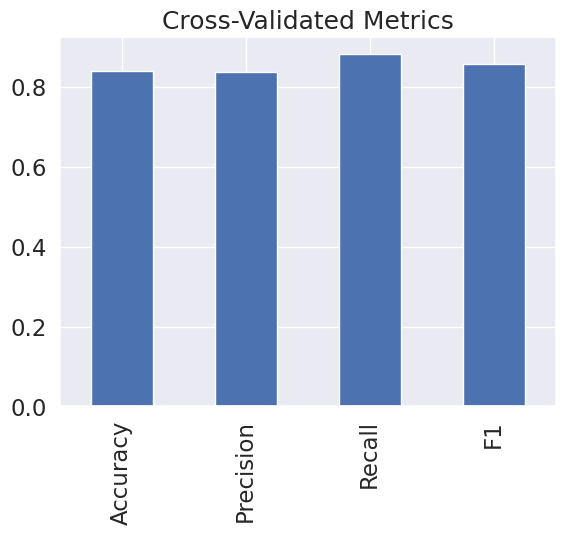

In [36]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

In [58]:
clf = rs_rf.estimator.fit(X_train,y_train)
a = clf.feature_importances_

In [56]:
b = df.columns[0:13]

Text(0.5, 1.0, 'Feature Importance')

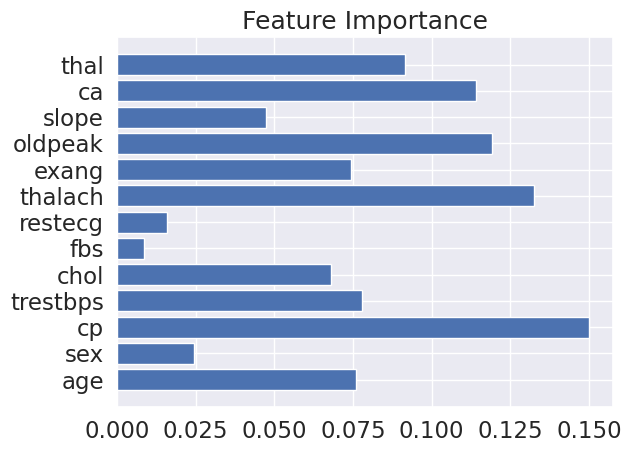

In [64]:
plt.barh(b,a)
plt.title('Feature Importance')